<a href="https://colab.research.google.com/github/cslm1/fastai/blob/main/fastai_disinfo_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install fastbook

      Successfully uninstalled fastai-1.0.61


In [3]:
!mkdir ./disinfo_chn_rus

In [ ]:
import fastai
import requests as r

!gsutil cp gs://twitter-election-integrity/hashed/2020_05/china_052020/china_052020_tweet_media_hashed/china_052020_hashed_012.zip ./disinfo_chn_rus
!gsutil cp gs://twitter-election-integrity/hashed/2020_05/russia_052020/russia_052020_tweet_media_hashed/russia_052020_hashed_009.zip ./disinfo_chn_rus


In [ ]:
!unzip ./disinfo_chn_rus/china_052020_hashed_012.zip -d ./disinfo_chn_rus/
!unzip ./disinfo_chn_rus/russia_052020_hashed_009.zip -d ./disinfo_chn_rus/

In [6]:
import fastbook 
from fastbook import *
from fastai.vision.widgets import *
from os import *
import pandas as pd

In [ ]:


base_path_chn = "/content/china_052020_hashed_012/"
base_path_rus = "/content/russia_052020_hashed_009/"

#we shall store all the file names in this list
# china
filelist_chn = []

for root, dirs, files in os.walk(base_path_chn):
	for file in files:
        #append the file name to the list
		filelist_chn.append(os.path.join(base_path_chn,file))

# russia
filelist_rus = []

for root, dirs, files in os.walk(base_path_rus):
	for file in files:
        #append the file name to the list
		filelist_rus.append(os.path.join(base_path_rus,file))




In [ ]:


df_chn = pd.DataFrame(filelist_chn, columns = ["value"])

chn_jpgs = df_chn[df_chn.value.str.contains(".jpg")]

df_rus = pd.DataFrame(filelist_rus, columns = ["value"])

rus_jpgs = df_rus[df_rus.value.str.contains(".jpg")]


In [11]:


ims = get_image_files("disinfo_chn_rus")



def rus_or_chn_disinfo(x):
  culprit = x.parent.parent.name
  if "russia" in culprit:
    return "russian"
  if "china" in culprit:
    return "chinese"


In [10]:
"china" in ims[0].parent.parent.name

True

In [12]:
#path_str = os.path.dirname(ims[0])

#"china" in path_str
path = Path("disinfo_chn_rus")

dls = ImageDataLoaders.from_path_func(path
    , get_image_files(path), valid_pct=0.2, seed=42,
    label_func=rus_or_chn_disinfo, item_tfms=Resize(224))



In [14]:
failed = verify_images(ims)
failed

(#0) []

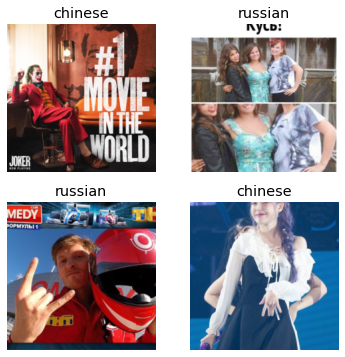

In [16]:
dls.valid.show_batch(max_n = 4)

In [17]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

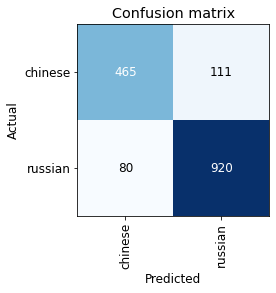

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

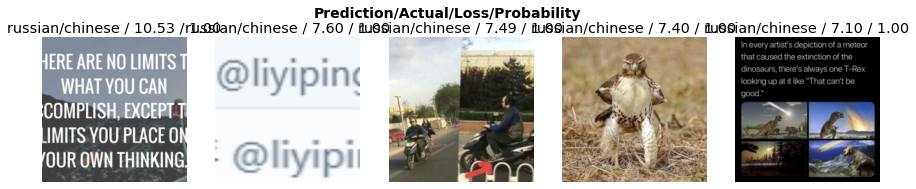

In [19]:
interp.plot_top_losses(5, nrows=1)

In [20]:
# To clean up the dataset
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
search_images_ddg()